# Исследование объявлений о продаже квартир

В основе проекта лежат данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')

In [2]:
data.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Необходимо использовать в качестве разделителя знак "\t", поскольку данные "склеились".

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' , decimal='.')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В данном датасете представлены следующие столбцы:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Всего в датасете 23699 строк. Во многих столбцах есть пропуски. Также тип данных в некоторых столбцах не соответствует указанному типу в описании датасета. 

В столбце `first_day_exposition` во всех строках время равно 00:00, поэтому его можно убрать. 

В столбцах `rooms`, `ceiling_height`, `floors_total` присутствуют аномальные значения.

### Вывод

Таким образом, в нашем распоряжении довольно большой датасет. Прежде чем переходить к необходимым расчетам, необходимо провести предобработку данных: устранить аномальные значения, понять причину возникновения пропусков в некоторых столбцах, попытаться заполнить их, а также изменить тип данных определенных столбцов.

## Предобработка данных

Рассмотрим строки с аномальными значениями.

In [6]:
data[data['rooms'] == 0]['rooms'].count()

197

В датасете 197 строк с квартирами, в которых нет комнат. Это квартиры-студии, поэтому не будем подвергать изменениям данные строки.

In [7]:
data[data['ceiling_height'] < 2.5]['ceiling_height'].count()

73

Согласно строительным нормам, высота жилых помещений от пола до потолка должна быть не менее 2,5 м. Заменим все значения, которые ниже данной цифры, на минимальную высоту.

In [8]:
for string_number in data[data['ceiling_height'] < 2.5].index.to_list():
    data.loc[string_number, 'ceiling_height'] = 2.5
data[data['ceiling_height'] < 2.5]['ceiling_height'].count()

0

Также вопросы вызывают квартиры с высотой потолка выше 4 метров. 

In [9]:
data[data['ceiling_height'] > 4]['ceiling_height'].count()

75

Учитывая, что в нашем датасете присутствуют только жилые помещения, заменим высоту квартиры выше 4 на предполагаемое максимальное значение, равное 4. 

In [10]:
for string_number in data[data['ceiling_height'] > 4].index.to_list():
    data.loc[string_number, 'ceiling_height'] = 4
data[data['ceiling_height'] > 4]['ceiling_height'].count()

0

Низкие значения площади кухни в столбце `kitchen_area` могут объясняться особенностями квартиры (квартира-студия, кухня-гостиная и т.п.), поэтому эти данные можно оставить.

In [11]:
data[data['kitchen_area'] < 4].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,NaN,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
2165,15,3180000.0,25.0,2019-03-21T00:00:00,1,2.50,25.0,17.0,17,NaN,...,3.0,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.0
3078,17,6000000.0,43.0,2018-11-12T00:00:00,2,2.90,4.0,29.3,2,NaN,...,3.2,NaN,Санкт-Петербург,22357.0,5247.0,1.0,319.0,2.0,831.0,37.0
3195,17,2690000.0,25.6,2018-02-19T00:00:00,1,2.50,9.0,16.2,7,NaN,...,3.8,NaN,Санкт-Петербург,11033.0,11281.0,0.0,NaN,1.0,283.0,99.0
6084,6,770000.0,18.0,2017-10-16T00:00:00,1,NaN,5.0,13.0,4,NaN,...,3.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0


Исправив аномальные значения, можно перейти к заполнению пропусков.

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим строки с пропусками в столбце `ceiling_height`.

In [13]:
data[data['ceiling_height'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [14]:
data.corr()['ceiling_height']

total_images           0.043097
last_price             0.380604
total_area             0.470062
rooms                  0.293089
ceiling_height         1.000000
floors_total          -0.094160
living_area            0.447189
floor                 -0.048096
studio                 0.013074
open_plan              0.022025
kitchen_area           0.411683
balcony               -0.067691
airports_nearest      -0.106826
cityCenters_nearest   -0.368802
parks_around3000       0.272699
parks_nearest         -0.058514
ponds_around3000       0.240331
ponds_nearest         -0.148514
days_exposition        0.129016
Name: ceiling_height, dtype: float64

Видно, что высота потолка слабо зависит от площади квартиры, жилой площади и площади кухни. Последние два показателя напрямую зависят от первого, поэтому при заполнении пропущенных значений будем ссылаться на площадь квартиры.

In [15]:
#Делаем копию данных
data_int = data.loc[:,('total_area', 'living_area', 'ceiling_height')].dropna()
data_int['total_area_rounded'] = data_int['total_area'].astype('int')

# Округляем общую площадь до десятых
data_int['total_area_rounded'] = round(data_int['total_area_rounded'],-1)

data_int.head()

,total_area,living_area,ceiling_height,total_area_rounded
0,108.0,51.0,2.70,110
4,100.0,32.0,3.03,100
9,61.0,43.6,2.50,60
10,39.6,20.3,2.67,40
13,42.8,27.0,2.56,40


In [16]:
for string_number in data[data['ceiling_height'].isnull()].index.to_list():
    data.loc[string_number, 'ceiling_height'] = round(data_int[data_int['total_area_rounded'] == round(data.loc[string_number, 'total_area'],-1)]['ceiling_height'].mean(), 2)
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000.0,517.00,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.00,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
6221,8,34000000.0,470.30,2018-01-14T00:00:00,4,NaN,3.0,248.7,3,NaN,...,40.00,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
14498,6,32250000.0,374.60,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.60,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
14591,20,29000000.0,327.20,2017-11-15T00:00:00,6,NaN,4.0,177.3,4,NaN,...,27.10,NaN,Санкт-Петербург,53531.0,18024.0,0.0,NaN,2.0,194.0,274.0
20314,8,42000000.0,374.00,2017-04-09T00:00:00,7,NaN,4.0,239.4,3,NaN,...,51.00,0.0,Пушкин,15595.0,27749.0,3.0,62.0,3.0,274.0,9.0
21990,20,68000000.0,373.10,2018-09-08T00:00:00,8,NaN,8.0,176.2,8,NaN,...,29.40,NaN,Санкт-Петербург,37965.0,7873.0,1.0,562.0,3.0,691.0,234.0


Осталось 7 строк с пустыми данными, т.к. нет схожих квартир по площади, округленной до десятых. Вставим данные вручную.

In [17]:
data.loc[14591, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 340)&(data_int['total_area_rounded'] > 300)]['ceiling_height'].mean(),2)
data.loc[6221, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 500)&(data_int['total_area_rounded'] > 450)]['ceiling_height'].mean(),2)
data.loc[4237, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 530)&(data_int['total_area_rounded'] > 500)]['ceiling_height'].mean(),2)
data.loc[3676, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 460)&(data_int['total_area_rounded'] > 420)]['ceiling_height'].mean(),2)
data.loc[21990, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 390)&(data_int['total_area_rounded'] > 350)]['ceiling_height'].mean(),2)
data.loc[20314, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 390)&(data_int['total_area_rounded'] > 350)]['ceiling_height'].mean(),2)
data.loc[14498, 'ceiling_height'] = round(data_int[(data_int['total_area_rounded'] < 390)&(data_int['total_area_rounded'] > 350)]['ceiling_height'].mean(),2)

data['ceiling_height'].isna().sum()

0

Больше пустых строк в столбце `ceiling_height` нет. 

Рассмотрим пропуски в столбце `living_area`.

In [18]:
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.13,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.76,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.59,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Как правило, жилая площадь составляет определенный процент от общей площади квартиры. Рассчитаем его с помощью использованной ранее копии данных, в которой общая площадь округлена до десятых, и заполним пропуски в столбце `living_area`.

In [19]:
data_int['living_area_share'] = data_int['living_area'] / data_int['total_area']
data_int.head()

,total_area,living_area,ceiling_height,total_area_rounded,living_area_share
0,108.0,51.0,2.70,110,0.472222
4,100.0,32.0,3.03,100,0.320000
9,61.0,43.6,2.50,60,0.714754
10,39.6,20.3,2.67,40,0.512626
13,42.8,27.0,2.56,40,0.630841


In [20]:
for string_number in data[data['living_area'].isnull()].index.to_list():
    data.loc[string_number, 'living_area'] = round(data_int[data_int['total_area_rounded'] == data.loc[string_number, 'total_area'].round(-1)]['living_area'].mean(), 1)

data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,3.70,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
19392,5,71000000.0,371.00,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
22131,14,27000000.0,422.20,2018-10-18T00:00:00,5,2.70,13.0,NaN,11,NaN,...,NaN,NaN,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN


In [21]:
data.loc[3676, 'living_area'] = round(data_int[(data_int['total_area_rounded'] < 460)&(data_int['total_area_rounded'] > 420)]['living_area'].mean(),1)
data.loc[19392, 'living_area'] = round(data_int[(data_int['total_area_rounded'] < 390)&(data_int['total_area_rounded'] > 350)]['living_area'].mean(),1)
data.loc[22131, 'living_area'] = round(data_int[(data_int['total_area_rounded'] < 440)&(data_int['total_area_rounded'] > 400)]['living_area'].mean(),1)

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце `kitchen_area`, скорее всего, означают, что в квартире кухня-гостиная, либо это квартира-студия. Кухня-гостиная может быть как в квартирах с большой площадью, так и с маленькой. А вот в квартирах-студиях число комнат равно 0, поэтому такие пропуски можно заполнить "0".

In [23]:
for string_number in data[(data['kitchen_area'].isna())&(data['rooms'] == 0)].index.to_list():
    data.loc[string_number, 'kitchen_area'] = 0

Пропуски в столбце `locality_name` заполнить не представляется возможным, поскольку квартира может находиться в любой части города. Аналогично со столбцом `floors_total`.

Пропуски в столбце `days_exposition` могут означать, что объявление ещё не снято с публикации, поэтому заполнять их не нужно.

В столбцах `is_apartment`, `balcony`, `parks_around3000`, `ponds_around3000` пропуск означает отсутствие, поэтому пропуски можно заполнить "0" (или False).

In [24]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony']=data['balcony'].fillna(0)
data['parks_around3000']= data['parks_around3000'].fillna(0)
data['ponds_around3000']= data['ponds_around3000'].fillna(0)

Заполнив пропуски с учетом наших возможностей, перейдем к изменению типов данных в столбцах. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21618 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Прежде всего необходимо привести столбец `first_day_exposition` к типу даты.

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Число балконов, комнат, этажей, парков, водоёмов, цена измеряются в целых значениях, поэтому соответствующие столбцы нужно привести к целочисленному типу.

In [27]:
data['rooms'] = data['rooms'].astype('int')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.68,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,3.13,14.0,96.3,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Некоторые столбцы также можно привести к целочисленному типу, однако в них присутствуют пропуски.

### Вывод

Таким образом, нами были устранены аномальные значения, по возможности заполнены пропуски, а также изменены типы данных некоторых столбцов. Можно переходить к дальнейшим расчетам.

## Расчёты и добавление результатов в таблицу

Цена квадратного метра:

In [28]:
data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.68,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,3.13,14.0,96.3,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


День недели, месяц и год публикации объявления:

In [29]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.68,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,3.13,14.0,96.3,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


Этаж квартиры (первый, последний, другой):

In [30]:
def define_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_options'] = data.apply(define_floor, axis=1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [31]:
data['living_area_share'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_share'] = round(data['kitchen_area'] / data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_weekday,exposition_month,exposition_year,floor_options,living_area_share,kitchen_area_share
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81.0,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.68,5.0,34.3,4,False,...,2,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,3.13,14.0,96.3,9,False,...,3,234.0,424.0,408176.10,4,7,2015,другой,0.61,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41


### Вывод

Таким образом, нами были рассчитаны и добавлены в таблицу следующие данные: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [32]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(1)

,total_area,last_price,rooms,ceiling_height
count,23699.0,23699.0,23699.0,23699.0
mean,60.3,6541548.8,2.1,2.7
std,35.7,10887013.3,1.1,0.2
min,12.0,12190.0,0.0,2.5
25%,40.0,3400000.0,1.0,2.6
50%,52.0,4650000.0,2.0,2.7
75%,69.9,6800000.0,3.0,2.8
max,900.0,763000000.0,19.0,4.0


Среднее значение площади квартиры составляет 60,3 кв.м., а медианное - 52 кв.м. Минимальная площадь, с которой продается квартира - 12 кв.м., а максимальная - 900 кв.м.

Среднее значение цены квартиры составляет 6 541 549 руб., а медианное - 4 650 000 руб. Минимальная цена, за которую продают квартиру - 12 190 руб., а максимальная - 763 000 000 руб.

В среднем в продаваемых квартирах 2 комнаты, столько же составляет их медианное значение. Есть квартиры, в которых нет комнат, а есть квартиры с 19 комнатами.

Среднее значение высоты потолка квартиры составляет 2,1 м, а медианное - 2 м. Минимальная высота потолка составляет 2,5 метра, а максимальная - 4 м.

Построим гистограммы для площади, цены, числа комнат и высоты потолков.

Площадь квартиры, кв.м


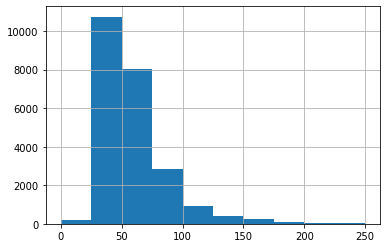

Цена на момент снятия с публикации, тыс. руб.


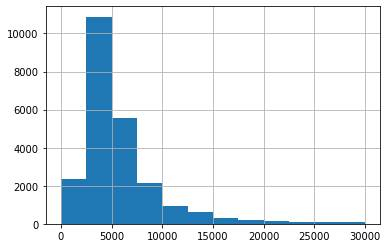

Число комнат, шт.


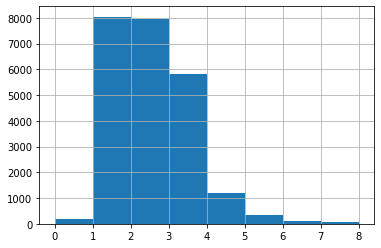

Высота потолков, м


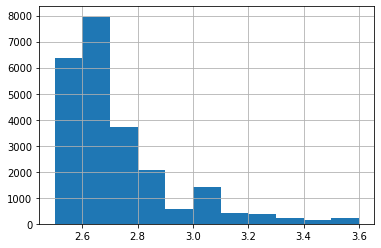

In [33]:
import matplotlib.pyplot as plt

print('Площадь квартиры, кв.м')
data['total_area'].hist(bins=10, range=(0,250))
plt.show()

print('Цена на момент снятия с публикации, тыс. руб.')
(data['last_price'] / 1000).hist(bins=12, range=(0, 30000))
plt.show()

print('Число комнат, шт.')
data['rooms'].hist(bins=8, range=(0,8))
plt.show()

print('Высота потолков, м')
data['ceiling_height'].hist(bins=11,range=(2.5,3.6))
plt.show()

Изучим время продажи квартиры. 

In [34]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

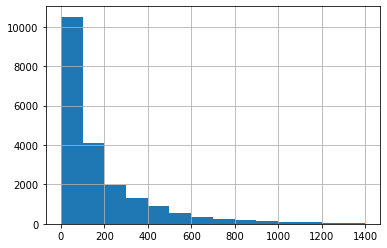

In [35]:
data['days_exposition'].hist(bins=14,range=(0,1400))

В среднем, квартира продается за 181 день. Медианное значение срока продажи квартиры составляет 95 дней, что является более приближенным к реальности, поскольку подтверждается гистограммой.

Если квартира продавалась до 45 дней, то её продажа произошла очень быстро (быстрее 75% выборки). Если квартира продается более 232 дней, то её продажа происходит необычно долго (дольше 75% выборки).

Перейдем к удалению редких и выбивающихся значений.

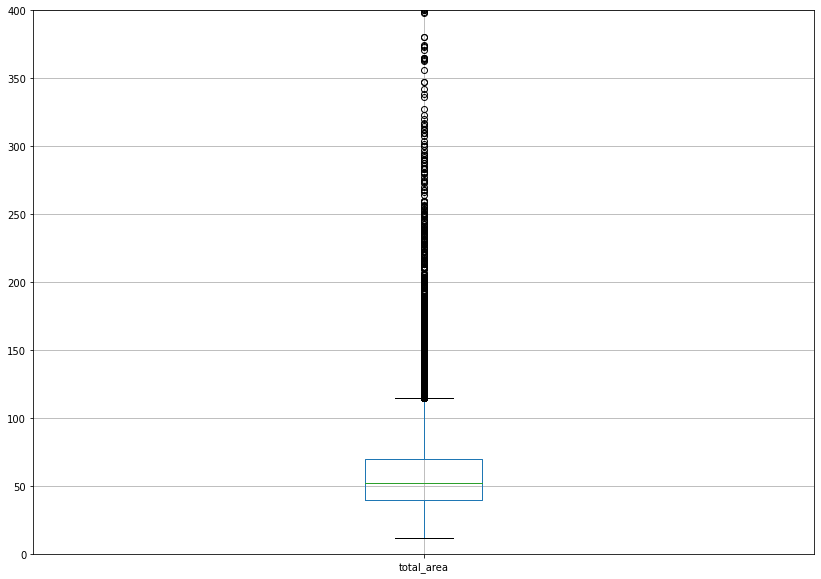

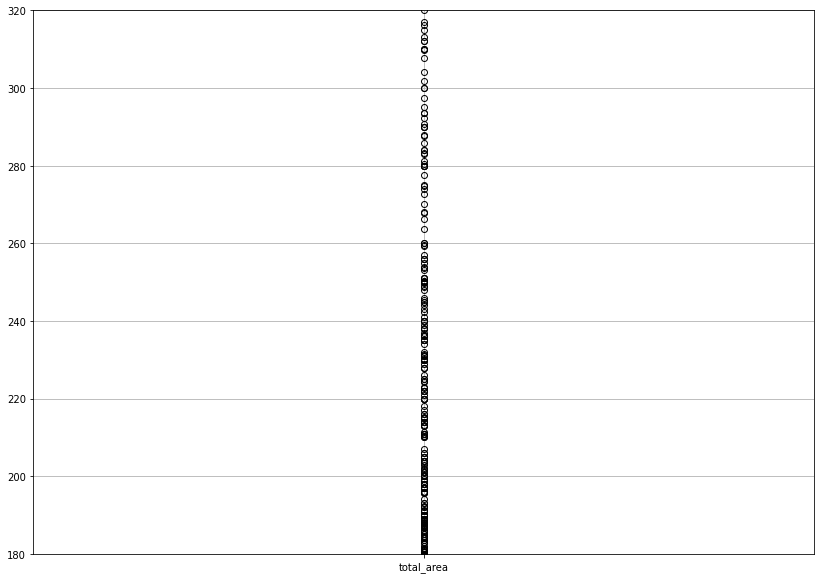

In [36]:
data.boxplot(column='total_area', figsize=(14,10))
plt.ylim(0,400)
plt.show()

data.boxplot(column='total_area', figsize=(14,10))
plt.ylim(180,320)
plt.show()

Из второго графика видно, что определенная "плотность" данных по площади квартиры сохраняется вплоть до значения 260.

In [37]:
data_filtered = data.query('total_area <= 260')

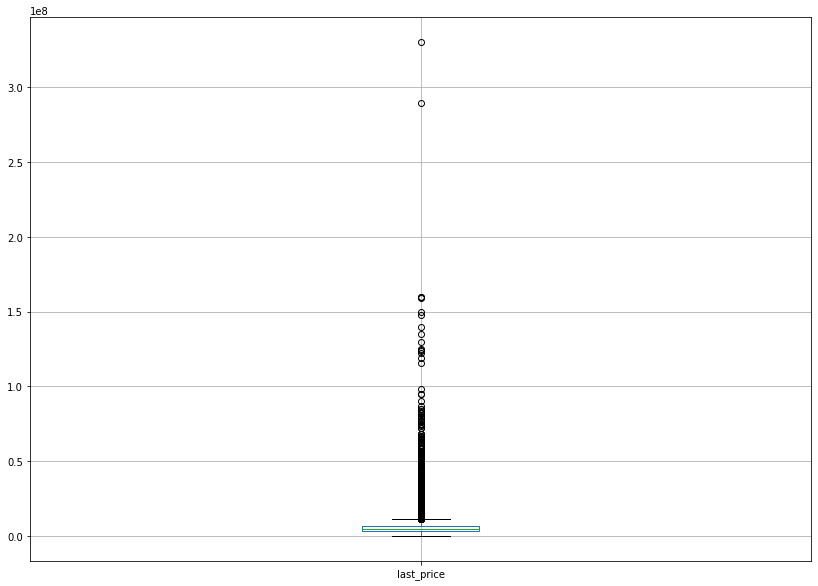

(40000000.0, 120000000.0)

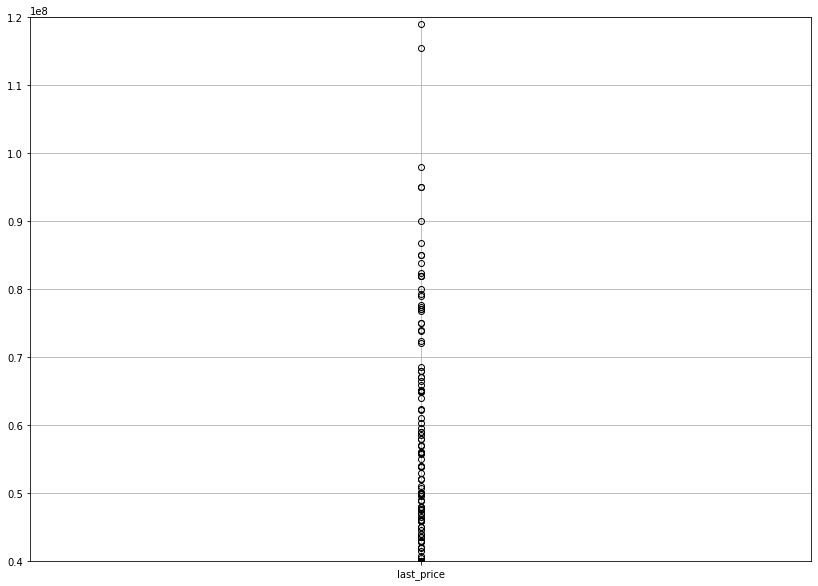

In [38]:
data_filtered.boxplot(column='last_price', figsize=(14,10))
plt.show()

data_filtered.boxplot(column='last_price', figsize=(14,10))
plt.ylim(0.4e+08,1.2e+08)

На этом графике видно, что "плотность" данных о цене квартиры сохраняется вплоть до значения 0.7e+08 (70 000 000 руб.).

In [39]:
data_filtered = data_filtered.query('last_price <= 0.7e+08')

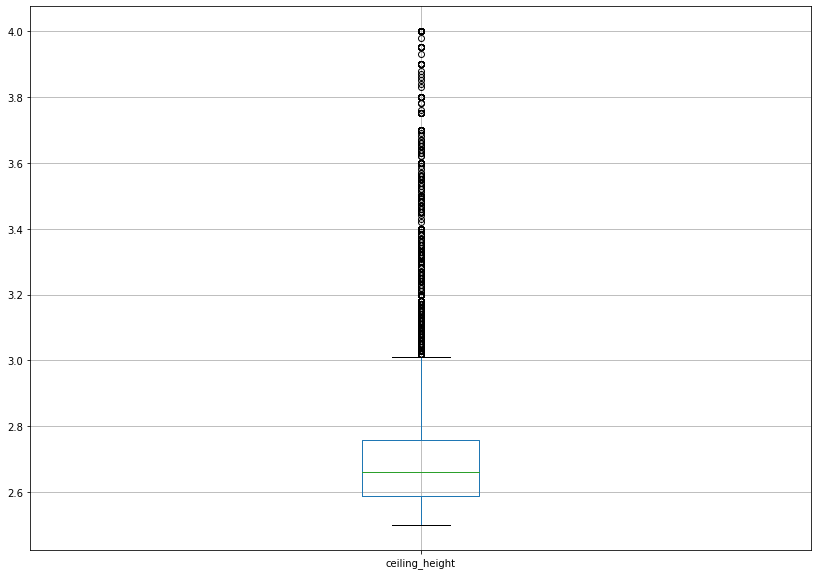

(3.0, 4.0)

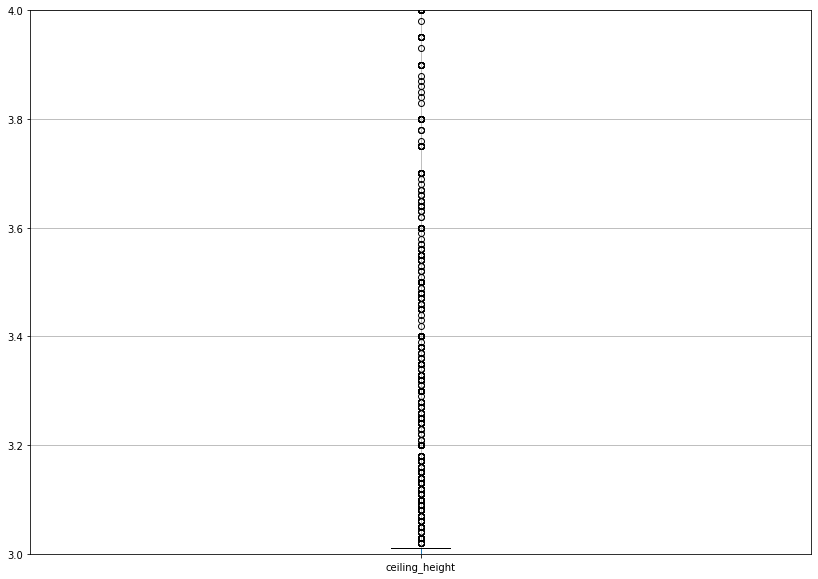

In [40]:
data_filtered.boxplot(column='ceiling_height', figsize=(14,10))
plt.show()

data_filtered.boxplot(column='ceiling_height', figsize=(14,10))
plt.ylim(3,4)

"Плотность" данных о высоте потолка квартиры сохраняется вплоть до значения 3,7.

In [41]:
data_filtered = data_filtered.query('ceiling_height <= 3.7')

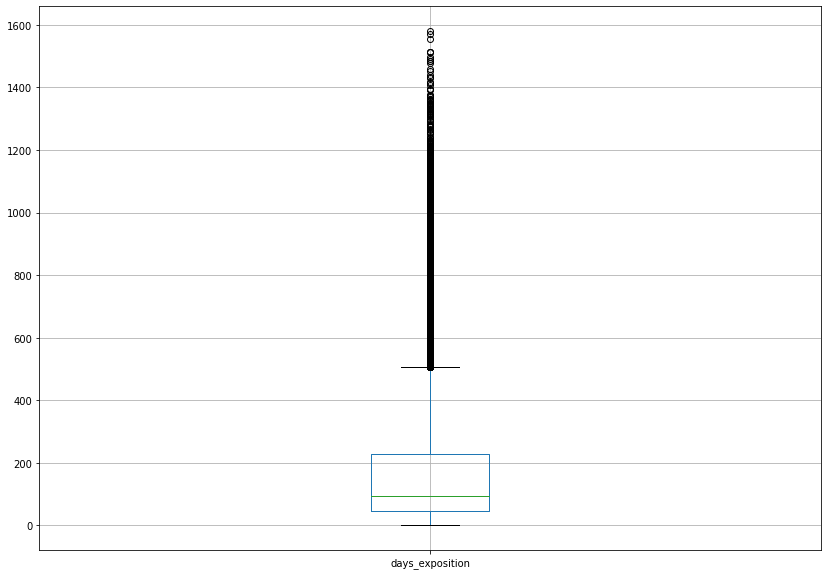

(1000.0, 1600.0)

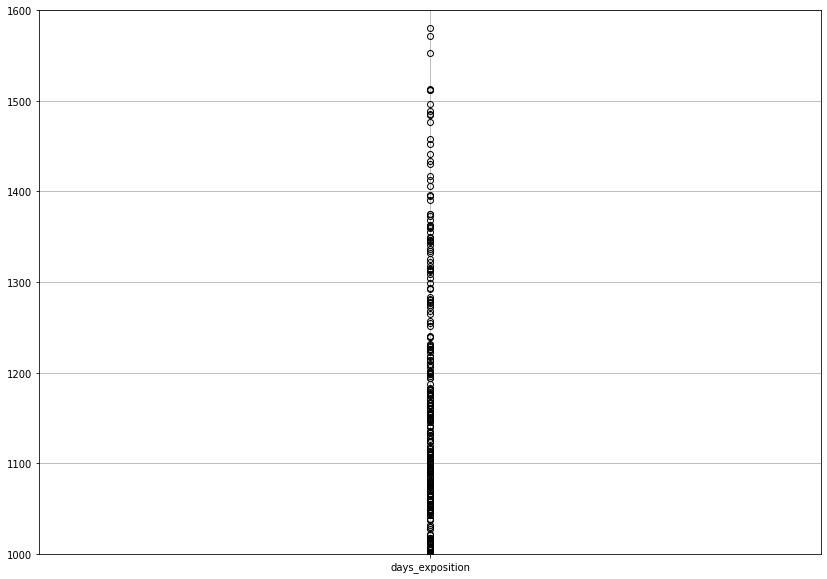

In [42]:
data_filtered.boxplot(column='days_exposition', figsize=(14,10))
plt.show()

data_filtered.boxplot(column='days_exposition', figsize=(14,10))
plt.ylim(1000,1600)

"Плотность" данных о сроках продажи квартиры сохраняется вплоть до значения 1380 дней.

In [43]:
data_filtered = data_filtered.query('days_exposition <= 1380')

Перейдем к изучению факторов, влияющих на стоимость квартиры.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

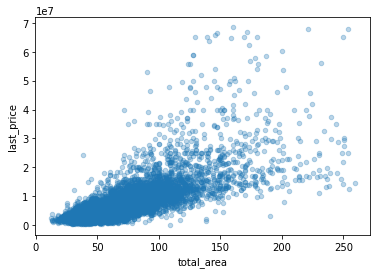

In [44]:
data_filtered.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

Очевидно, что чем больше площадь, тем больше цена. Однако данная зависимость носит четкий характер примерно до 150 кв.м, затем, похоже, начинают играть роль иные факторы.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

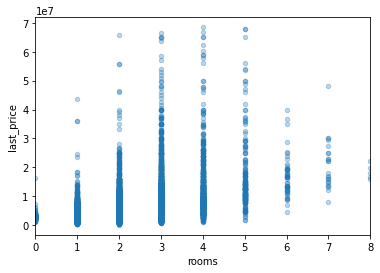

In [45]:
data_filtered.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3, xlim = (0, 8))

Чем выше число комнат, тем больше цена квартиры.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

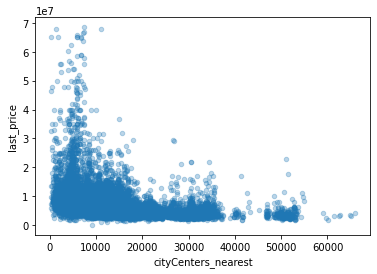

In [46]:
data_filtered.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

Зависимость похожа на гиперболическую: чем ближе квартира находится к центру, тем больше увеличивается стоимость квартир. И наоборот, чем дальше квартира от центра, тем меньше падает её цена.

In [47]:
data_filtered[['last_price', 'total_area',  'rooms', 'cityCenters_nearest',]].corr()['last_price']

last_price             1.000000
total_area             0.751729
rooms                  0.467177
cityCenters_nearest   -0.315896
Name: last_price, dtype: float64

Указанные ранее выводы подтверждаются корреляцией: самая большая прямая зависимость между ценой и площадью, чуть меньше связаны цена и число комнат. Зависимость между стоимостью и удаленностью от центра обратнопропорциональная и относительно слабая.

<AxesSubplot:xlabel='floor_options'>

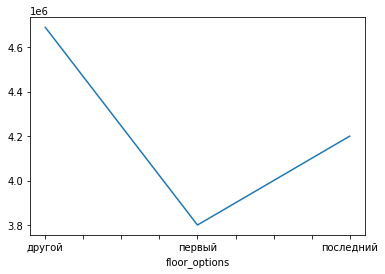

In [48]:
data_filtered.groupby('floor_options')['last_price'].median().plot()

Очевидно, что средняя цена квартиры на первом этаже намного меньше цены квартиры на последнем этаже, а средняя стоимость квартир не на первом и последних этажах выше остальных.

<AxesSubplot:xlabel='exposition_weekday'>

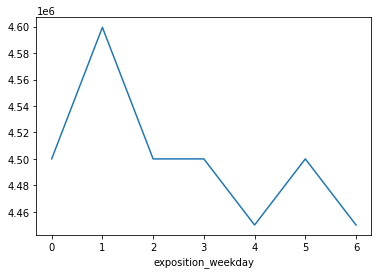

In [49]:
data_filtered.groupby('exposition_weekday')['last_price'].median().plot()

0 - воскресенье, 6 - суббота.
 Средняя стоимость квартир, размещенных в понедельник выше, чем по неделе. А средняя стоимость квартир, размещенных в четверг и субботу, ниже остальных.

<AxesSubplot:xlabel='exposition_month'>

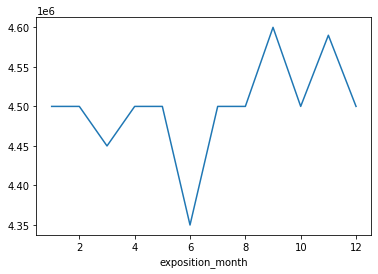

In [50]:
data_filtered.groupby('exposition_month')['last_price'].median().plot()

В июне продаются самые дешевые квартиры, а самые дорогие - в сентябре и ноябре. Также в марте наблюдается небольшой провал в стоимости квартир.

<AxesSubplot:xlabel='exposition_year'>

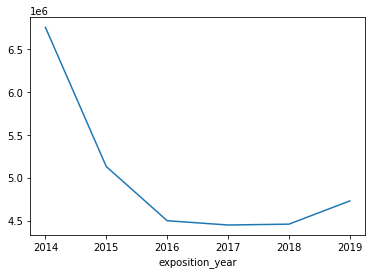

In [51]:
data_filtered.groupby('exposition_year')['last_price'].median().plot()

С 2014 по 2016 наблюдается сильное падение стоимости квартир. С 2016 по 2018 падение сильно замедлилось, а с 2018 стоимость квартир снова начала расти.

Перейдем к изучению объявлений в разрезе населенных пунктов.

In [52]:
result = data_filtered.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median'])
result.columns = ['count', 'mean']
result.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,13420,102876.175
посёлок Мурино,515,86111.110
посёлок Шушары,407,76125.000
Всеволожск,336,65789.470
Колпино,307,73913.040
посёлок Парголово,301,91346.150
деревня Кудрово,299,91860.470
Пушкин,298,97725.710
Гатчина,267,67187.500


Таким образом, в Санкт-Петербурге наблюдаются самые высокие цены на квартиры. Чуть меньше стоимость в Пушкине и Кудрово.
В Топ-10 квартир по стоимости наименьшая цена наблюдается в Всеволожске и Выборге.

Изучим квартиры в Санкт-Петербурге.

<AxesSubplot:xlabel='center_distance'>

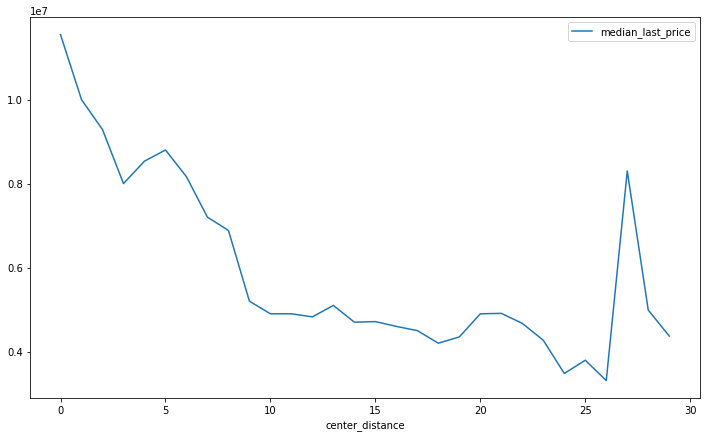

In [53]:
data_filtered['center_distance'] = round(data_filtered['cityCenters_nearest'] / 1000, 0)

data_filtered_spb = data_filtered[data_filtered['locality_name'] == 'Санкт-Петербург']
result = data_filtered_spb.pivot_table(index='center_distance', values='last_price', aggfunc=['median'])
result.columns = ['median_last_price']

result.plot(figsize = (12,7))

От 0 до 3 км наблюдается изменение стоимости квартир. Таким образом, радиус центра города составляет примерно 3 км.

Перейдем к изучению квартир в центре Санкт-Петербурга.

In [54]:
data_filtered_spb_centre = data_filtered.query('center_distance <= 3')

print('Данные по базе квартир')
display(data_filtered[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(2))
print('Данные по центру Санкт-Петербурга')
display(data_filtered_spb_centre[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(2))

Данные по базе квартир


,total_area,last_price,rooms,ceiling_height
count,20264.00,20264.00,20264.0,20264.00
mean,57.27,5740891.06,2.0,2.70
std,26.97,4883292.06,1.0,0.19
min,12.00,12190.00,0.0,2.50
25%,39.30,3400000.00,1.0,2.59
50%,50.40,4500000.00,2.0,2.66
75%,67.00,6400000.00,3.0,2.76
max,259.60,68500000.00,14.0,3.70


Данные по центру Санкт-Петербурга


,total_area,last_price,rooms,ceiling_height
count,655.00,655.00,655.00,655.00
mean,89.61,11388010.64,3.02,3.04
std,41.63,8312924.07,1.42,0.29
min,12.00,2100000.00,0.00,2.50
25%,60.72,6800000.00,2.00,2.82
50%,81.50,9000000.00,3.00,3.00
75%,108.00,13000000.00,4.00,3.23
max,253.70,68000000.00,14.00,3.70


Всего в очищенной от выбросов базе 20264 объявлений о продаже квартир, из них только 655 находятся в центре города.

Можно выделить следующие параметры для сравнения:
* Медианная площадь квартир по всей базе составляет 50 кв.м, а в центре - 81 кв.м.
* Медианная цена квартир по всей базе составляет 4 500 000 руб., а в центре - 9 000 000 руб.
* Медианная число комнат квартир по всей базе составляет 2 шт., а в центре - 3 шт.
* Медианная высота потолка квартир по всей базе составляет 2,66 м, а в центре - 3 м.

Изучим влияние различных факторов на стоимость квартир в центре Санкт-Петербурга.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

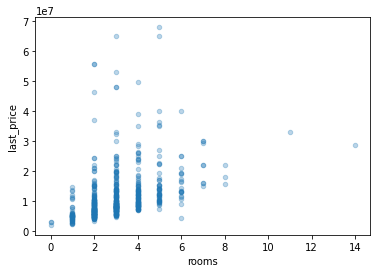

In [55]:
data_filtered_spb_centre.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)

Чем больше число комнат, тем больше цена. Данная зависимость аналогичная общей зависимости по всей базе и носит более четкий характер.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

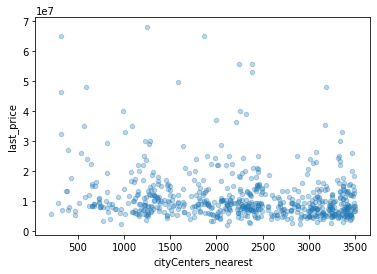

In [56]:
data_filtered_spb_centre.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

А вот расстояние от центра города (в пределах 3,5 км) не оказывает значительное влияние на стоимость квартиры, в отличие от влияния по всей базе.

In [57]:
data_filtered_spb_centre[['last_price',  'rooms', 'cityCenters_nearest',]].corr()['last_price']

last_price             1.000000
rooms                  0.408506
cityCenters_nearest   -0.180363
Name: last_price, dtype: float64

Коэффициенты корреляции говорят о том, что цена квартир в центре Санкт-Петербурга меньше зависит от числа комнат и близости к центру, чем в целом по базе.

<AxesSubplot:xlabel='floor_options'>

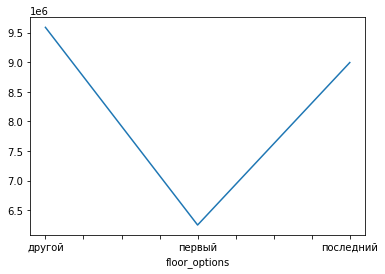

In [58]:
data_filtered_spb_centre.groupby('floor_options')['last_price'].median().plot()

Зависимость квартиры от этажа схожа с зависимостью по всей базе: средняя цена квартиры на первом этаже намного меньше цены квартиры на последнем этаже, а средняя стоимость квартир не на первом и последних этажах выше остальных.

<AxesSubplot:xlabel='exposition_weekday'>

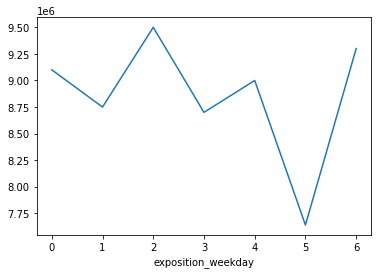

In [59]:
data_filtered_spb_centre.groupby('exposition_weekday')['last_price'].median().plot()

Зависимость стоимости квартир от дня недели схожа с общей зависимостью по базе, но сдвигается "вправо" на один день: цена квартиры растет во вторник и субботу (а не понедельник и пятницу) и падает в пятницу (а не в четверг).


<AxesSubplot:xlabel='exposition_month'>

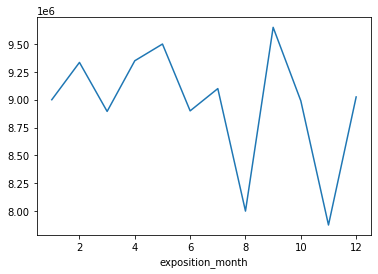

In [60]:
data_filtered_spb_centre.groupby('exposition_month')['last_price'].median().plot()

Зависимость стоимости квартир от месяца в целом схожа с общей зависимостью по базе, но немного отличается после апреля. Стоимость квартир падает в июне и августе, значительно увеличивается в сентябре, а затем снова значительно падает в ноябре и увеличивается в декабре.

<AxesSubplot:xlabel='exposition_year'>

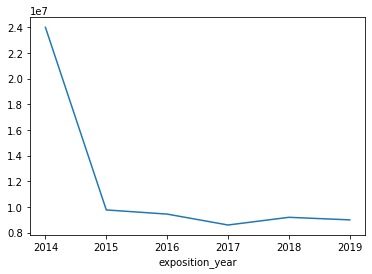

In [61]:
data_filtered_spb_centre.groupby('exposition_year')['last_price'].median().plot()

Стоимость квартир в центре с 2014 по 2018 падала (так же, как и в целом по базе), однако в 2019 году не произошло увеличение стоимости квартир.

### Вывод

Таким образом, нами изучены площадь, цена, число комнат, высота потолков, время продажи квартиры, убраны редкие и выбивающиеся значения, а также определено вляние факторов на стоимость квартиры. Кроме этого, нами была изучена десятка населённых пунктов с наибольшим числом объявлений, определен радиус центра Санкт-Петербурга и проведено сравнение между найденными ранее зависимостями в целом по базе и по квартирам в центре.

## Общий вывод

Основываясь на результатах исследования, можно сделать следующие практически применимые выводы:
* Всего в базе 20264 объявлений о продаже квартир, пригодных для выявления закономерностей, из них только 655 находятся в центре города.
* В Топ-10 по количеству обявлений входят Санкт-Петербург, Мурино, Шушары, Всеволожск, Колпино, Парголово, Кудрово, Пушкин, Гатчина	и Выборг. В Санкт-Петербурге наблюдаются самые высокие цены на квартиры. Чуть меньше стоимость в Пушкине и Кудрово. Наименьшая цена наблюдается в Всеволожске и Выборге.
* Радиус центра Санкт-Петербурга составляет примерно 3 км.
* Медианная площадь квартир по всей базе составляет 50 кв.м, а в центре - 81 кв.м.
* Медианная цена квартир по всей базе составляет 4 500 000 руб., а в центре - 9 000 000 руб.
* Медианная число комнат квартир по всей базе составляет 2 шт., а в центре - 3 шт.
* Медианная высота потолка квартир по всей базе составляет 2,66 м, а в центре - 3 м.
* Медианное значение срока продажи квартиры составляет 95 дней.
* Если квартира продавалась до 45 дней, то её продажа произошла очень быстро. Если квартира продается более 232 дней, то её продажа происходит необычно долго.
* Цена квартиры прямопропорциональна площади и числу комнат, обратнопропорциональна удалённости от центра. Последняя зависимость практически не оказывает влияние на стоимость, если квартира находится в радиусе 3км от центра.
* Средняя цена квартиры на первом этаже намного меньше цены квартиры на последнем этаже, а средняя стоимость квартир не на первом и последних этажах выше остальных.
* В среднем по всей базе цена размещаемых квартир растет в понедельник и пятницу и падает в четверг. Цена размещаемых квартир в центре дорожает во вторник и субботу и дешевеет в субботу. 
* В среднем по всей базе в июне размещаются объявления о продаже самых дешевых квартир, а самых дорогих - в сентябре и ноябре. Также в марте наблюдается небольшой провал в стоимости квартир. Стоимость квартир в центре Санкт-Петербурга падает в июне и августе, значительно увеличивается в сентябре, а затем снова значительно падает в ноябре и увеличивается в декабре.
* С 2014 по 2016 наблюдается сильное падение стоимости квартир. С 2016 по 2018 падение сильно замедлилось, а с 2018 стоимость квартир снова начала расти, однако стоимость квартир в центре расти не стала.